In [62]:
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import sympy as sp
import numpy as np
import math

In [9]:
def printMR(name, x):
    display("{} - mean: {:.4f} var: {:.4f}".format(name, np.mean(x), np.var(x)))

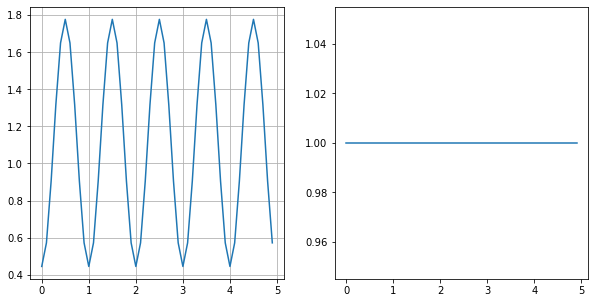

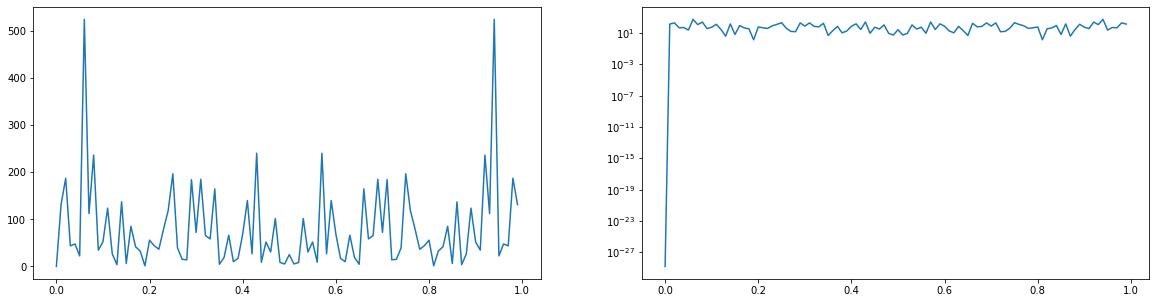

In [69]:
# Problem 1
N = 100
UnMean = 0
UnVar = 1
Un = np.random.normal(UnMean, math.sqrt(UnVar), N)
# 
Xn = Un - (1/3)*np.roll(Un, -1)
Yn = np.array([Un[n] for n in range(len(Un))])
# Zn = (1/math.sqrt(N))*Yn
# 
# # 1.1
# printMR("X[n]", Xn)
# printMR("Y[n]", Yn)
# printMR("Z[n]", Zn)

# 1.3
f = sp.symbols("f")
PSDX = ((10/9)-(1/3)*sp.exp(1j*2*sp.pi*f)-(1/3)*sp.exp(-1j*2*sp.pi*f)).rewrite(sp.cos)
PSDU = 1
x = np.arange(0, 5, 0.1)
Yx = [PSDX.subs({f: xVal}).evalf() for xVal in x]
Yu = np.zeros(len(x))+PSDU

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].grid()
ax[0].plot(x, Yx)
ax[1].plot(x, Yu)

# 1.4
def periodogram(y):
    f = np.arange(len(y))/len(y)
    sx = np.power(np.abs(scipy.fft.fft(y-np.mean(y))), 2)
    return f, sx
f, sx = periodogram(Yn)
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(f, sx)
ax[1].semilogy(f, sx)

#f, Pxx_den = signal.periodogram(Xn-np.mean(Xn), fs)
#plt.semilogy(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
#plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
#plt.show()

In [105]:
# Problem 2
N = 100
ZnA = -math.sqrt(3)
ZnB = +math.sqrt(3)
Zn = np.random.uniform(ZnA, ZnB, N)
display()

In [104]:
# Problem 3
x = sp.symbols("x")
exp = 217*(1-x**2)

## 2.1
r = 5
lamb = 47/(sp.pi*5**2)
r = sp.symbols("r")
mean = sp.integrate(sp.pi*r**2*lamb, (r, 0, 5))
display(mean.evalf())

### testing
UxB = 47/217
k = 0
test = sp.exp(-UxB)*((UxB**k)/(sp.factorial(k)))
display(1-test.evalf())

78.3333333333333

0.194739830417689